<a href="https://colab.research.google.com/github/dedemasutti/AI-projects/blob/master/Rede_neural_com_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

### Construindo a rede neural com keras

In [1]:

# Carregando os dados
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizando os dados de entrada para que fiquem entre 0 e 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Criando o modelo da rede neural
model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Camada de convolução com 32 filtros de 3x3 e função de ativação ReLU
    MaxPooling2D((2, 2)),  # Camada de max pooling com janela de 2x2
    Conv2D(64, (3, 3), activation='relu'),  # Outra camada de convolução com 64 filtros de 3x3 e função de ativação ReLU
    MaxPooling2D((2, 2)),  # Outra camada de max pooling com janela de 2x2
    Flatten(),  # Transforma o volume 3D em um vetor 1D
    Dense(64, activation='relu'),  #Camada com 64 neuronios
    Dense(10, activation='softmax')  # Camada de saida com 10 neuronios, um para cada classe e função de ativação softmax
])

# compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Avaliando a precisão do modelo nos dados de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"A precisão do modelo é: {test_accuracy * 100:.2f}%")


170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 47s 29ms/step - loss: 1.4566 - accuracy: 0.4775 - val_loss: 1.1893 - val_accuracy: 0.5857
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1035 - accuracy: 0.6147 - val_loss: 1.0583 - val_accuracy: 0.6286
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9709 - accuracy: 0.6633 - val_loss: 0.9824 - val_accuracy: 0.6576
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8824 - accuracy: 0.6929 - val_loss: 0.9529 - val_accuracy: 0.6744
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8129 - accuracy: 0.7189 - val_loss: 0.9669 - val_accuracy: 0.6737
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7540 - accuracy: 0.7365 - val_loss: 0.9071 - val_accuracy: 0.6951
Epoch 7/10
1563/1563 [==============================] - 4

### Plotando as imagens por classes das labels

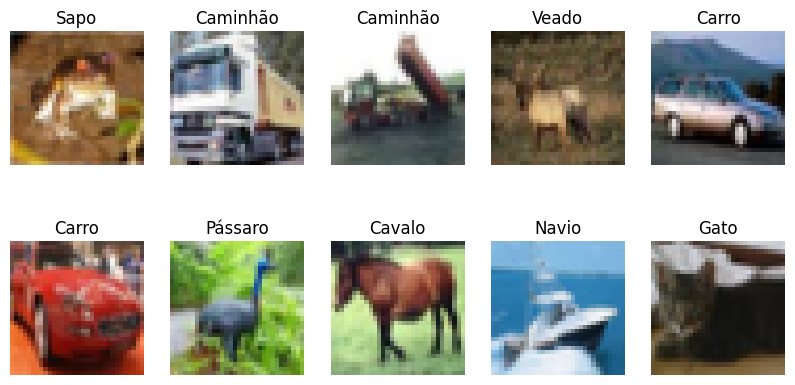

In [5]:
import matplotlib.pyplot as plt

# Classe de rótulos para mapear os números de classes para nomes
class_names = [
    "Avião", "Carro", "Pássaro", "Gato", "Veado",
    "Cachorro", "Sapo", "Cavalo", "Navio", "Caminhão"
]

# Plota as primeiras 10 imagens do conjunto de treinamento
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()